In [1]:
#necessary libraries
import matplotlib.pyplot as plt
import pandas as pd

#unneeded for base function but useful libraries
#import uncertainties as unc
#import numpy as np
#import sys
#%matplotlib notebook
plt.rcParams["font.family"] = "serif"

## Load data using pandas:

In [9]:
data = pd.read_csv('Gain.csv')

## Define case-specific variables (labels, titles, etc)

In [22]:
ξ = [1,.707,.5,.1]

#Labels, note the use of latex here
plot_title = 'Response of a Sallen-Key filter with varying damping coefficients (ξ) \n $f_o^{\,theory}=860\, Hz$, $f_o^{\,sim}=841\, Hz$'
axis_labels = ['Frequency (Hz)', 'Gain (dB)']
transfer_function = r'$\mathcal{H}(s) = \frac{\omega_o^2}{s^2+2\xi\omega_o s + \omega_o}$'

#Define which column is the independent data (e.g. frequency) and create a list of that data
x_data_index = 0 
x_data = data.iloc[:,x_data_index]

#Define which column(s) are the y data, must be array like!
y_data_indices = [1,2,3,4] 

## Plot!

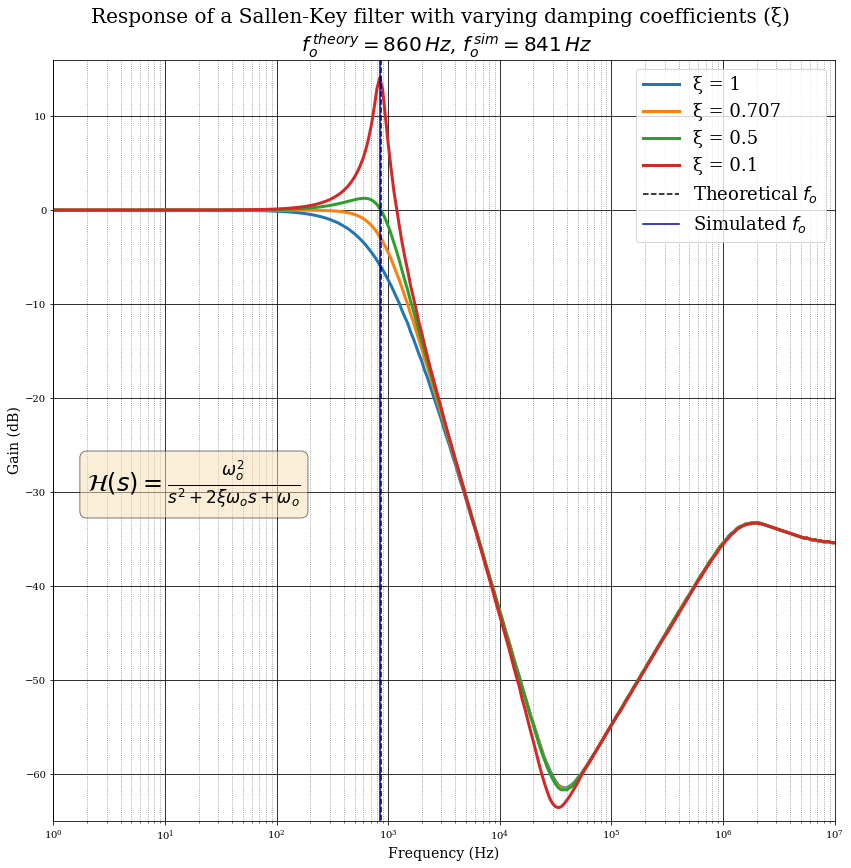

In [23]:
fig, ax = plt.subplots(1,1, figsize = (14,14))


#Go through and plot all columns against the x_data column
for i in y_data_indices:
    ax.plot(x_data, data[data.columns[i]], linewidth=3, label = f'ξ = {ξ[i-1]}') #edit label here directly, its easier

#Case specific plots, plots vertical lines to show x values where particular features occur; here it is the naturaly undamped frequency that we see
ax.plot([859.4,859.4],[-70,20], 'k--', label = r'Theoretical $f_o$')
ax.plot([x_data[117], x_data[117]],[-70,20], '-', color = '#0000aa', label = r'Simulated $f_o$')


#Text box for transfer function
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(2,-30, transfer_function, fontsize= 24,bbox=props)

#set plot title
ax.set_title(plot_title,size=20)

#place legend (note that mpl will try to find best location, see plt.legend documentation for specifics and overrides)
plt.legend(prop = {'size': 18})

# Set minor tick locations.
ax.set_xlabel(axis_labels[0],size=14)
ax.set_ylabel(axis_labels[1],size=14)

# Set grid to use minor tick locations. 
ax.grid(which = 'minor', color='gray',linestyle = ':')
ax.grid(which = 'major', color='black')

#Change x-axis to log scale
plt.xscale('log')

#Set axis limits if applicable
plt.xlim(1,10**7)
plt.ylim(-65,16)

#Save and show
plt.savefig('Bode_Plot_SK.png')
plt.show()